**Yahia Chammami**

## Importing Required Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler,  RobustScaler
#from xgboost import XGBClassifier
#from sklearn.svm import SVC
#from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, classification_report, accuracy_score, precision_recall_curve
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Define your custom colors
colors = ['#b3b3b3', '#FFFFFF']


In [4]:
file_path = '/content/heart_failure_clinical_records_dataset.csv'

# Loading And Reading Dataset
data = pd.read_csv(file_path)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Feature Information :

1. Age : age [years]
2. anaemia : Decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
4. diabetes : If the patient has diabetes (boolean)
5. ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure : If the patient has hypertension (boolean)
7. platelets : Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine : Level of serum creatinine in the blood (mg/dL)
9. serum_sodium : Level of serum sodium in the blood (mEq/L)
10. sex : Woman or man (binary)
11. smoking : If the patient smokes or not (boolean)
12. time : Follow-up period (days)
13. DEATH_EVENT : If the patient deceased during the follow-up period (boolean)



## Statistical analysis :

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.shape

(299, 13)

In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
data.isnull().mean() * 100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [10]:
# Convert the 'age' column to integer data type
data['age'] = data['age'].astype(int)

# Convert the 'platelets' column to integer data type
data['platelets'] = data['platelets'].astype(int)

# Create a deep copy of the DataFrame 'data' and assign it to 'df'
df = data.copy(deep=True)


In [11]:
# Update the 'Status' column to 'Survived' where 'DEATH_EVENT' is equal to 0
df.loc[df['DEATH_EVENT'] == 0, 'Status'] = 'Survived'

# Update the 'Status' column to 'Not Survived' where 'DEATH_EVENT' is equal to 1
df.loc[df['DEATH_EVENT'] == 1, 'Status'] = 'Not Survived'


In [12]:
# Get a list of all column names in the DataFrame
col = list(data.columns)

# Initialize empty lists to store categorical and numerical features
categorical_features = []
numerical_features = []

# Iterate through each column in the dataset
for i in col:
    # Check the number of unique values in the column
    if len(data[i].unique()) > 6:
        # If there are more than 6 unique values, consider it a numerical feature
        numerical_features.append(i)
    else:
        # Otherwise, consider it a categorical feature
        categorical_features.append(i)

# Print the lists of categorical and numerical features
print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features: age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Text(0.5, 0.98, 'Death Event')

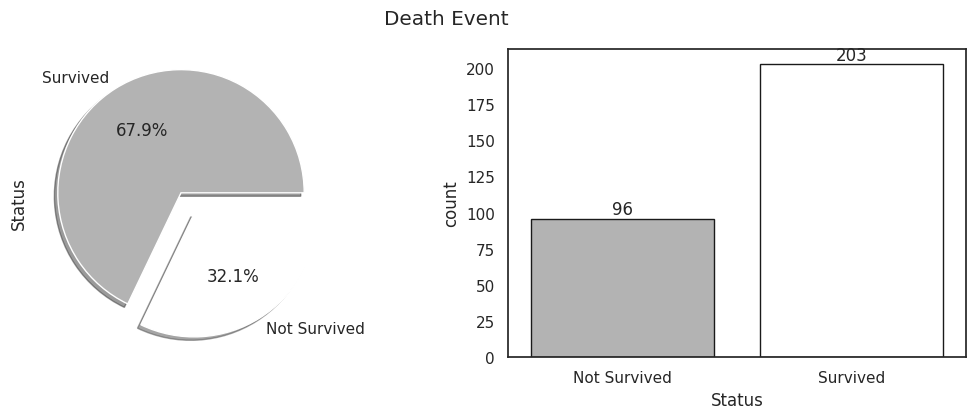

In [13]:
# Set the Seaborn style to 'white'
sns.set(style='white')

# Create a figure with 1 row and 2 columns
fig = plt.subplots(1, 2, figsize=(13, 4))

# Plot the pie chart in the first subplot
plt.subplot(1, 2, 1)
df['Status'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True,colors=colors)

# Create a countplot in the second subplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='Status', palette=colors, edgecolor='k')

# Label the bars in the countplot
ax.bar_label(ax.containers[0])

# Set the title for the entire figure
plt.suptitle('Death Event')


* The dataset has very low data points (299)
* The dataset is unbalanced with 2:1 ratio for No Death Event cases : Death Event cases
* Visualizations and Predictions will be biased towards No Death Event cases.







### Categorical Features

In [14]:
# Define a function to create categorical plots
def catplot(df, x):
    # Set Seaborn style to 'white'
    sns.set(style='white')

    # Create a figure with 1 row and 3 columns
    fig = plt.subplots(1, 3, figsize=(15, 4))

    # Plot a pie chart in the first subplot
    plt.subplot(1, 3, 1)
    df[x].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=colors,textprops={'fontsize': 12})

    # Plot a histogram with KDE in the second subplot
    plt.subplot(1, 3, 2)
    ax = sns.histplot(data=df, x=x, kde=True, color=colors[0], edgecolor='k')
    ax.bar_label(ax.containers[0])

    # Plot a countplot with hue in the third subplot
    plt.subplot(1, 3, 3)
    ax = sns.countplot(data=df, x=x, hue='Status', palette=colors, edgecolor='k')
    for container in ax.containers:
        ax.bar_label(container)

    # Set the title for the entire figure
    tit = x + ' vs Death Event'
    plt.suptitle(tit)

# Usage example:
# catplot(df, 'Some_Column_Name')

**Anemia**

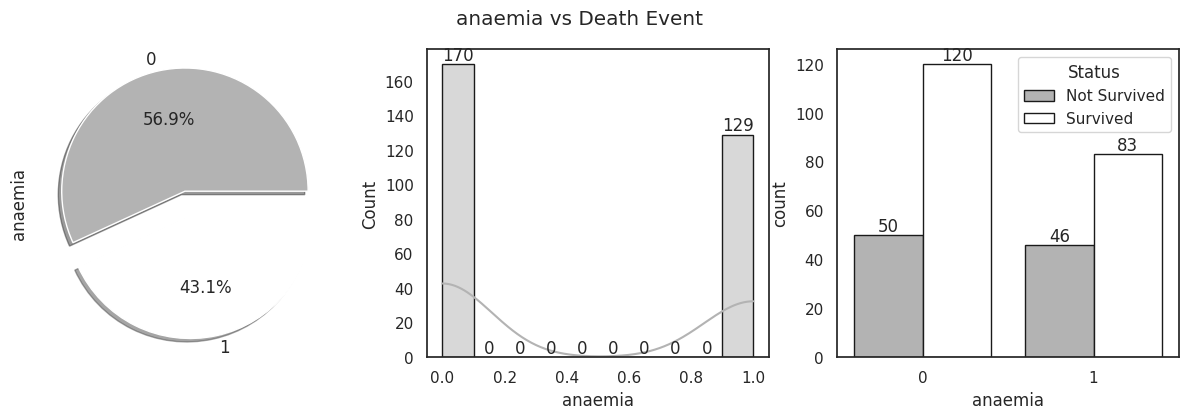

In [15]:
catplot(df, 'anaemia')


**Diabetes**

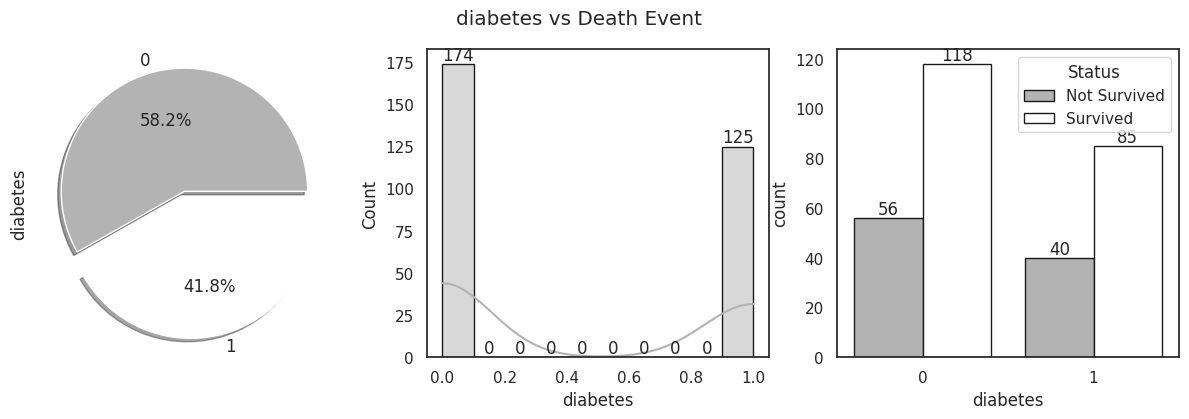

In [16]:
catplot(df, 'diabetes')


**high_blood_pressure**

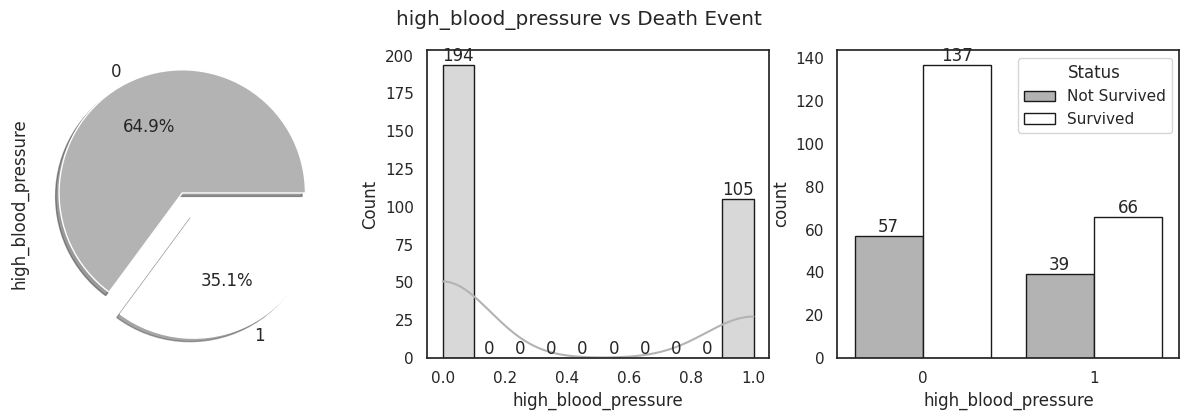

In [17]:
catplot(df, 'high_blood_pressure')


**Sex**

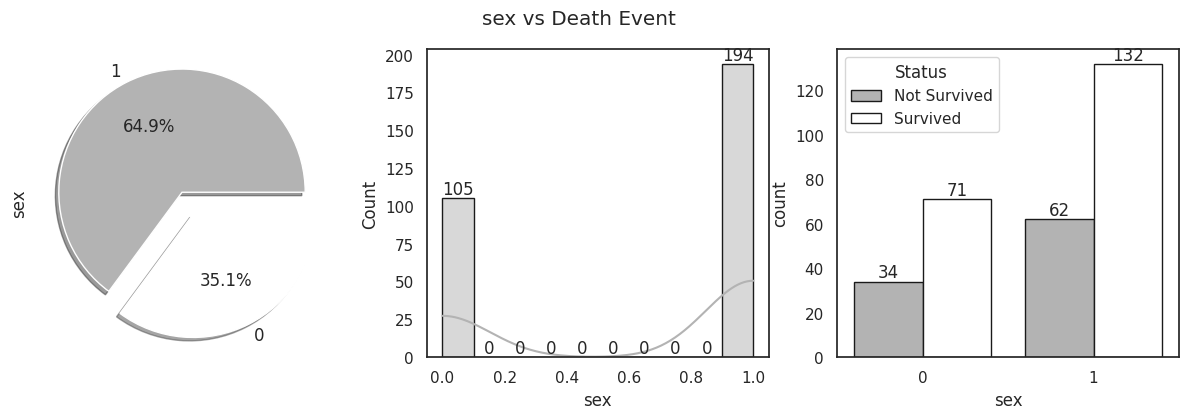

In [18]:
catplot(df, 'sex')


**Smoking**

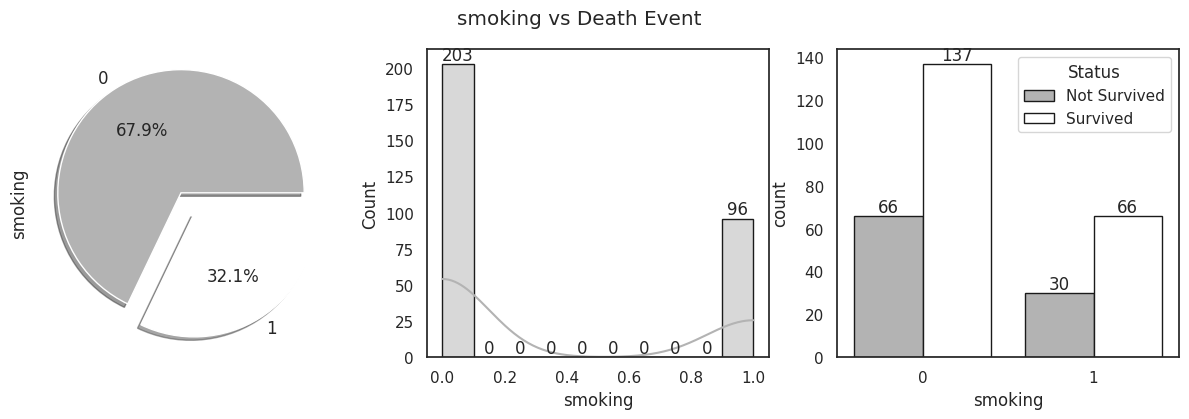

In [19]:
catplot(df, 'smoking')

### Summary
- Categorical Features Insight :
1. All the graphs have the same pattern
2. There are more cases of male population
- Categorical Features Sumary :
1. anaemia : Anaemia = No Anaemia
2. diabetes : Diabetes = No Diabetes
3. high_blood_pressure : High Blood Pressure > No High Blood Pressure (Needs more data)
4. sex : Male > Female
5. smoking : No Smoking > Smoking
- Genaral Information
1. anaemia : High chances of heart failures due to anaemia.
2. diabetes : High chances of heart failures due to diabetes.
3. high blood pressure : High chances with heart failures due to high blood pressure.
4. sex : male > female but by small margin are prone to more heart failures.
smoking : Smoking increases the chances of suffering from heart failures.

### Numerical Features

In [20]:
# Define a function to create numerical plots
def numplot(df, x, scale):
    # Set Seaborn style to 'whitegrid'
    sns.set(style='whitegrid')

    # Create a figure with 2 rows and 1 column
    fig = plt.subplots(2, 1, figsize=(15, 11))

    # Plot a histogram with KDE in the first subplot
    plt.subplot(2, 1, 1)
    ax = sns.histplot(data=df, x=x, kde=True, color=colors[0], edgecolor='k')
    ax.bar_label(ax.containers[0])
    tit = x + ' distribution'
    plt.title(tit)

    # Create a new column for grouping based on the scaling factor
    plt.subplot(2, 1, 2)
    tar = x + '_group'
    Tstr = str(scale)
    tit2 = x + ' vs Death Event (' + Tstr + ':1)'
    df[tar] = [int(i / scale) for i in df[x]]
    ax = sns.countplot(data=df, x=tar, hue='Status', palette=colors, edgecolor='k')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(tit2)

# Usage example:
# numplot(df, 'Some_Column_Name', Scale_Factor)


**Age**

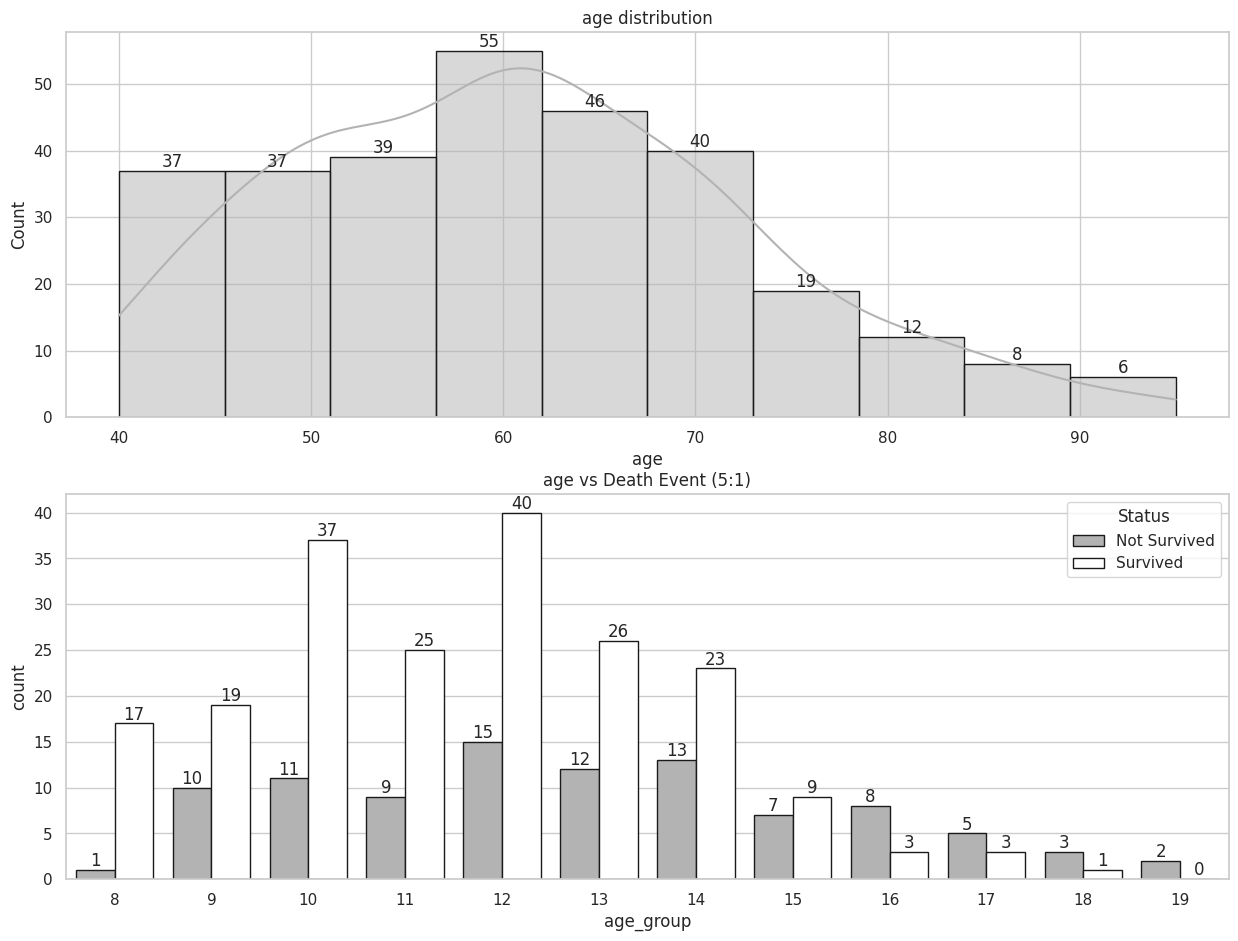

In [21]:
numplot(df, 'age', 5)


**Creatinine Phosphokinase**

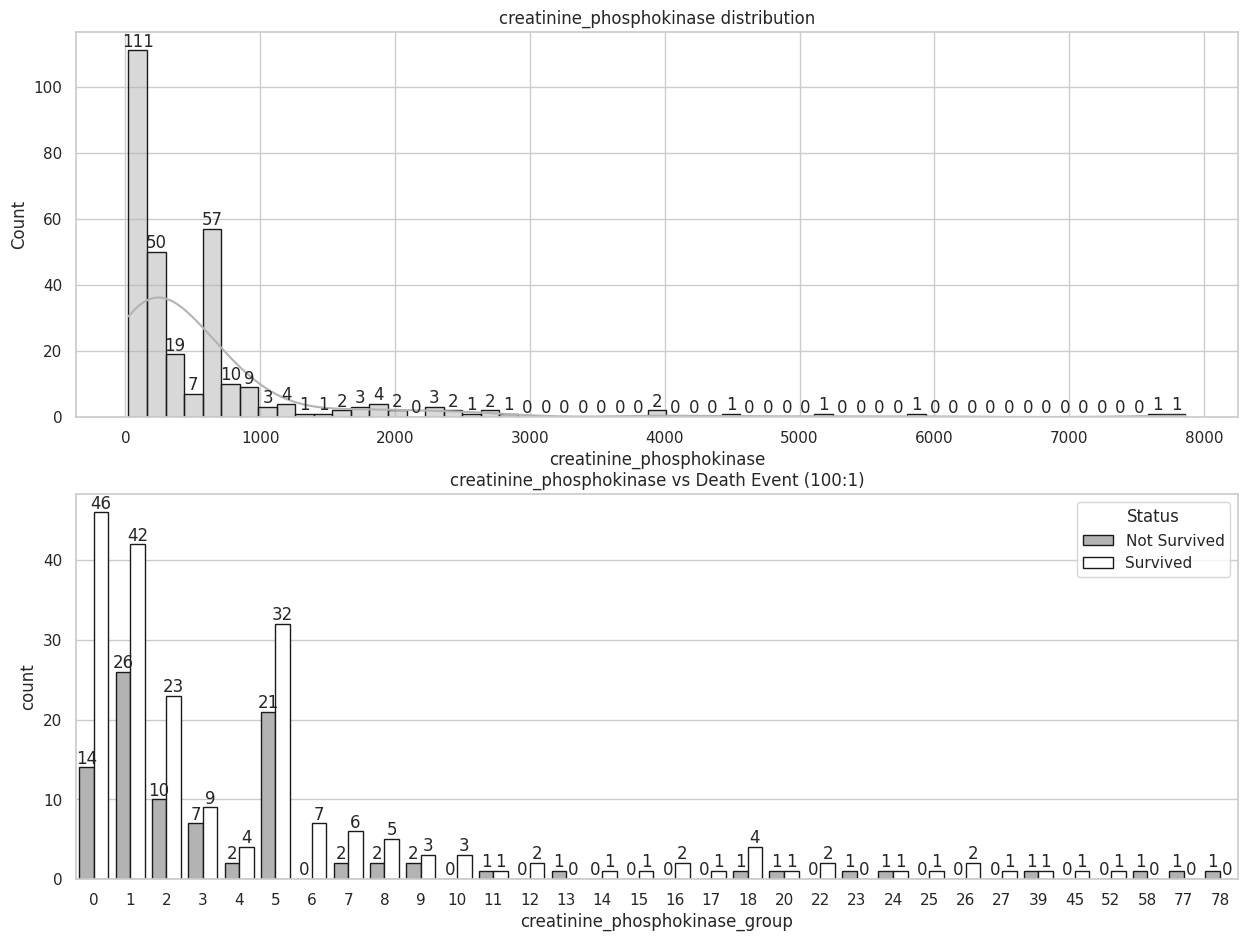

In [22]:
numplot(df, 'creatinine_phosphokinase', 100)


**Ejection_fraction**

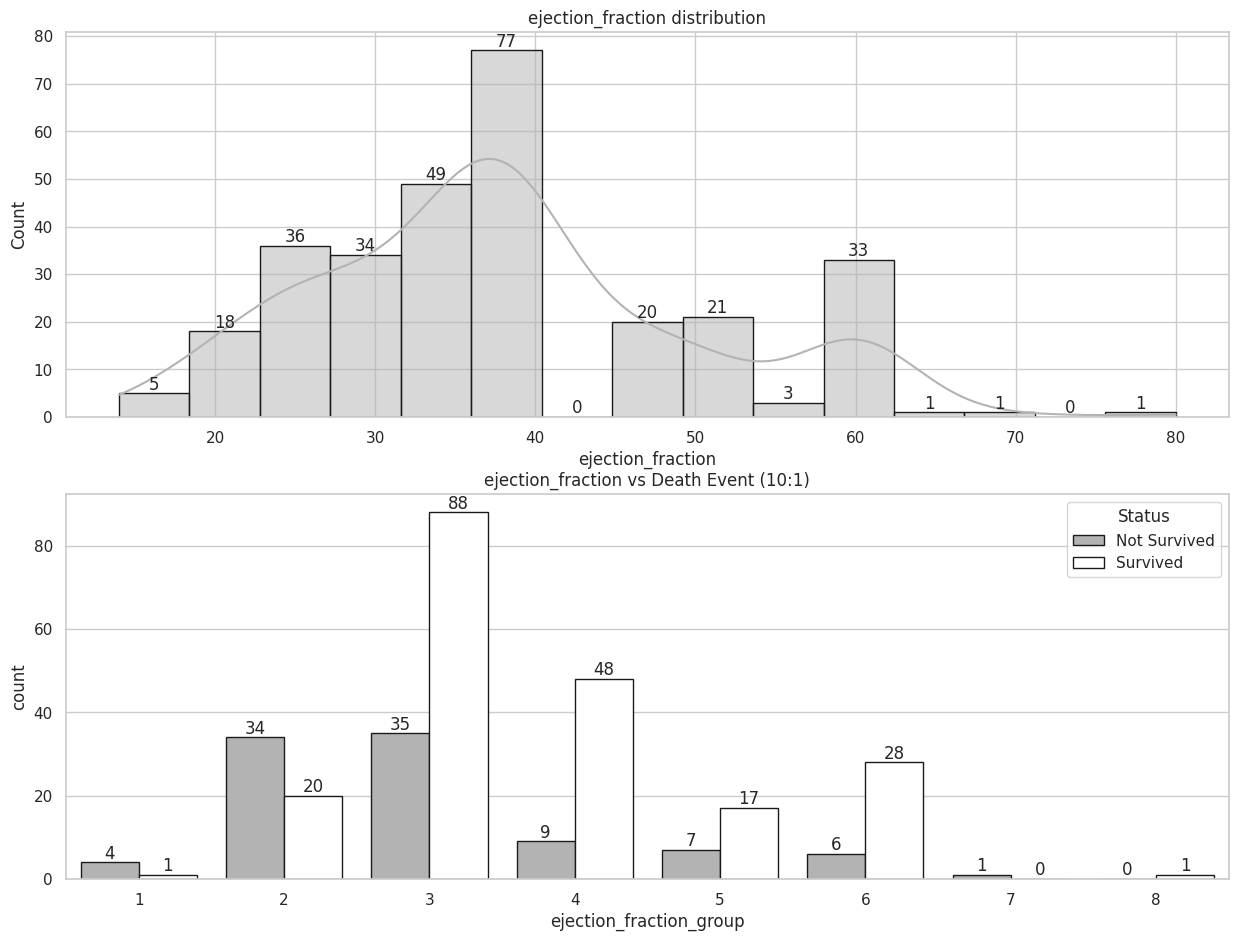

In [23]:
numplot(df, 'ejection_fraction', 10)


**Platelets**

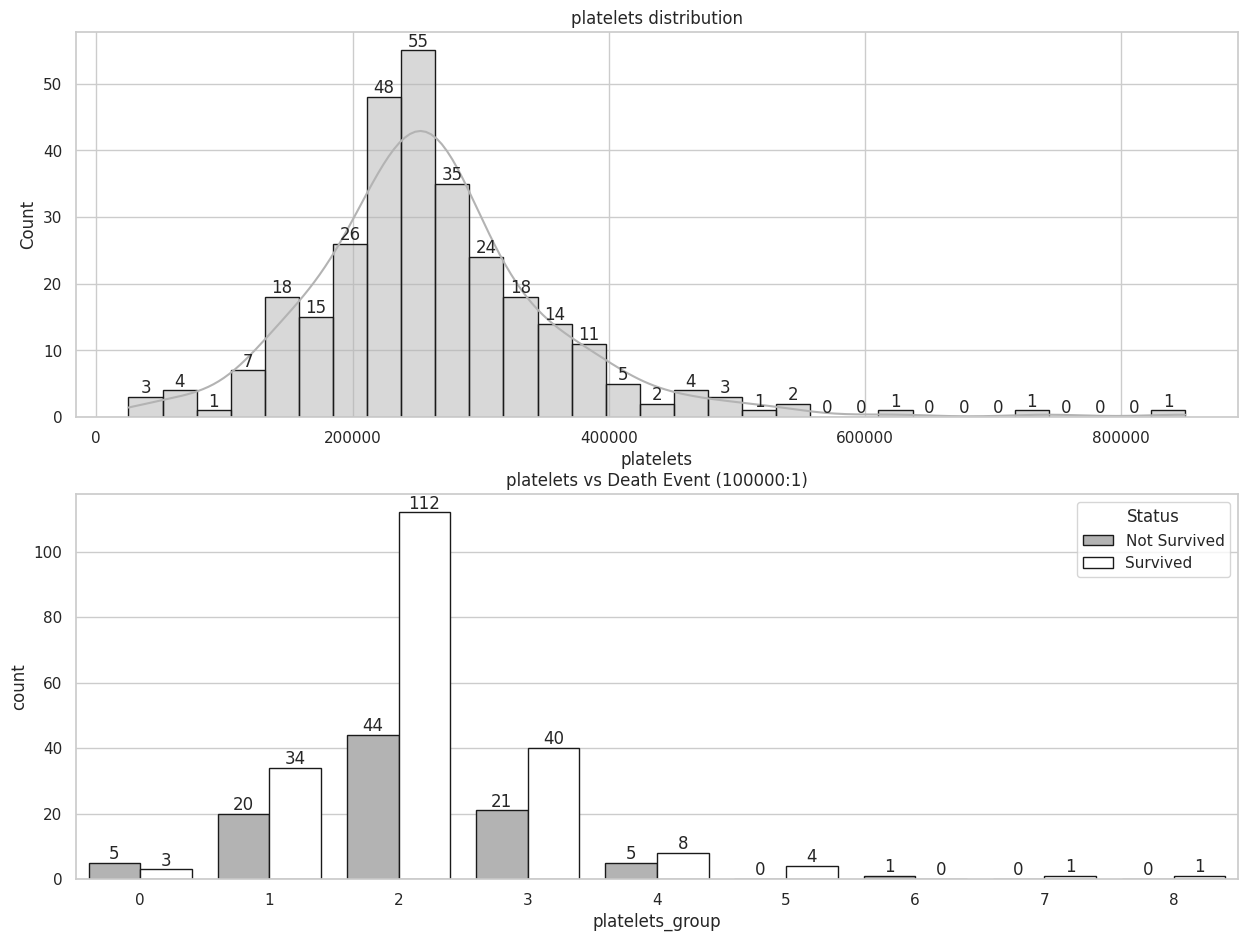

In [24]:
numplot(df, 'platelets', 10**5)


### serum_creatinine

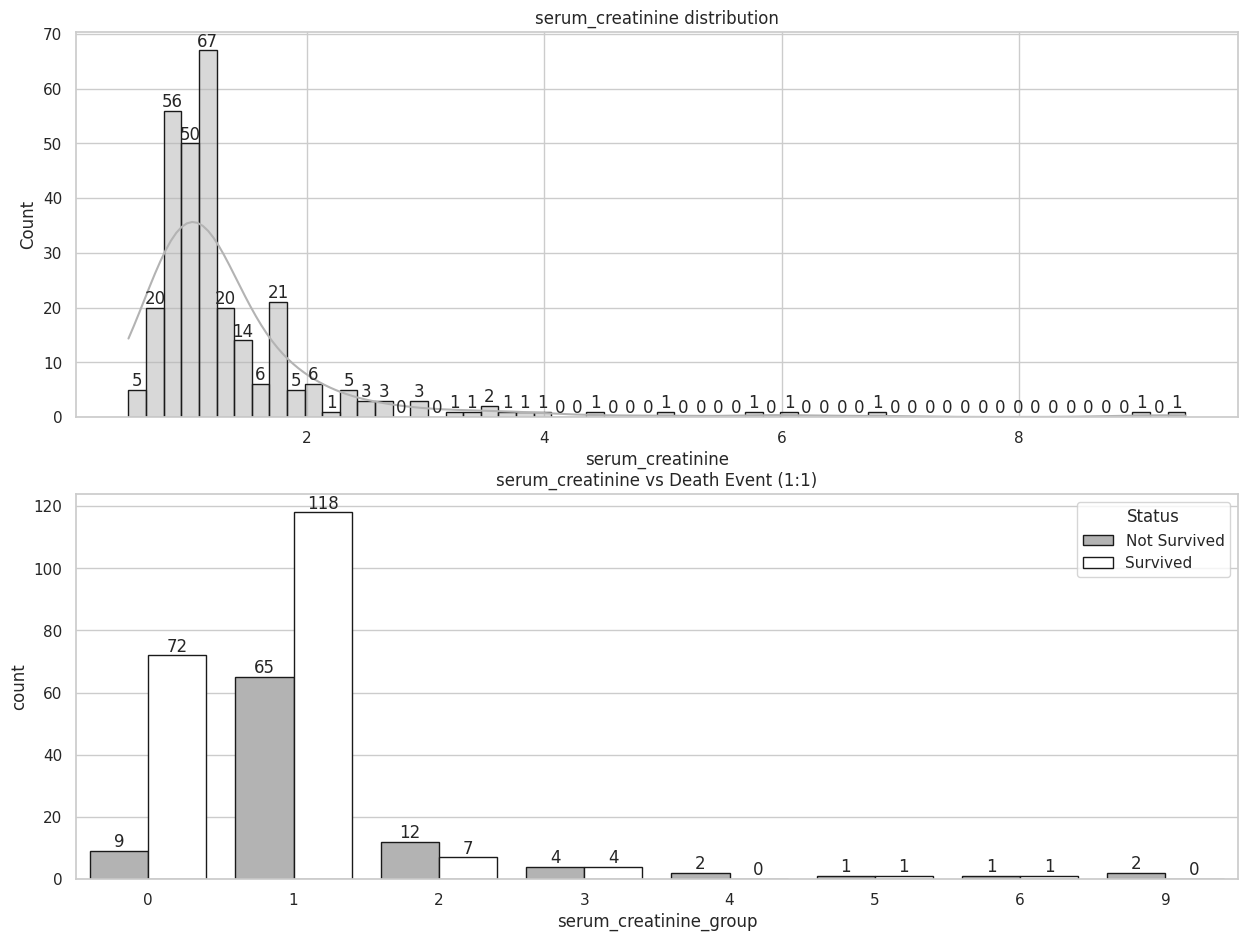

In [25]:
numplot(df, 'serum_creatinine', 1)


**serum_sodium**

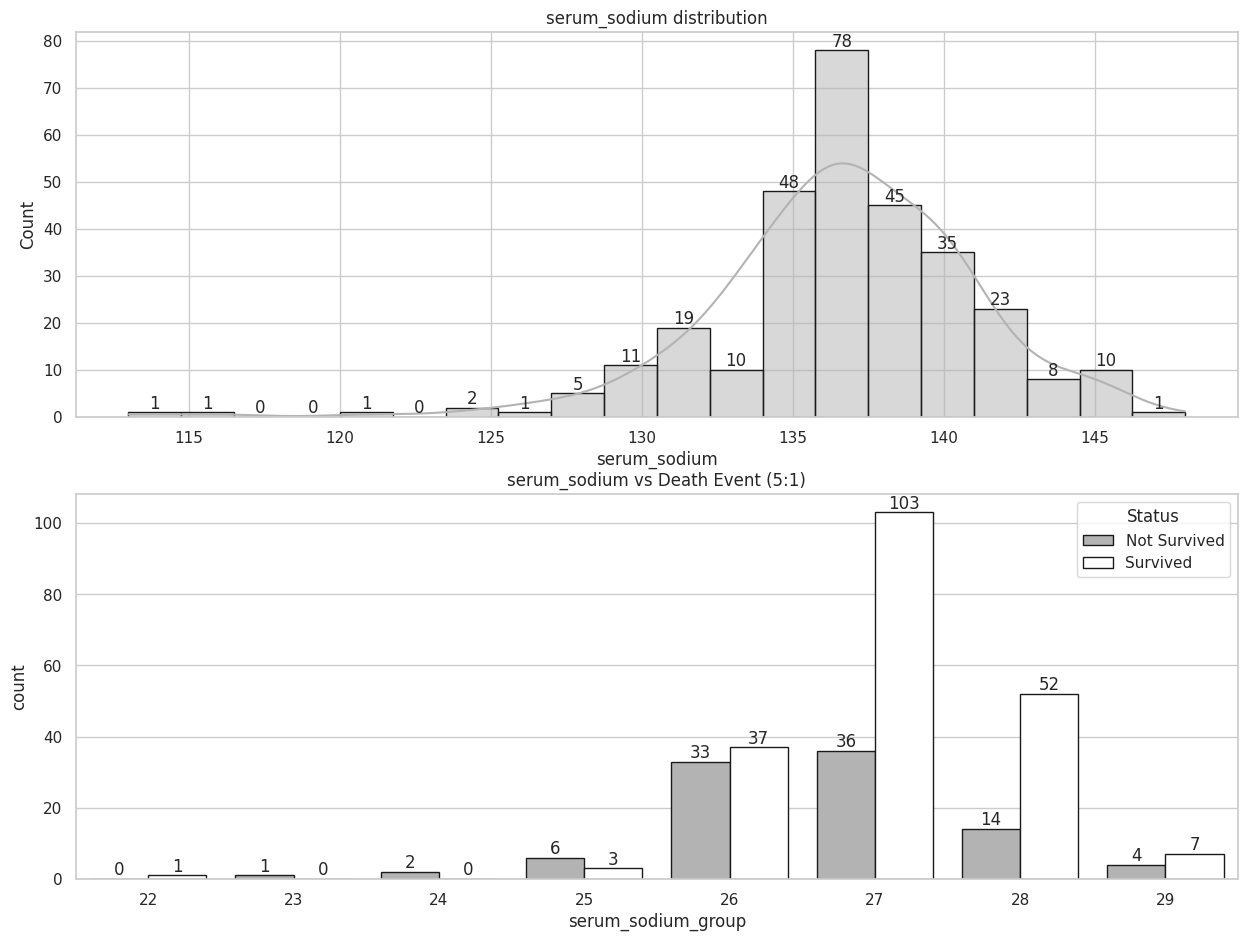

In [26]:
numplot(df, 'serum_sodium', 5)


**Time**

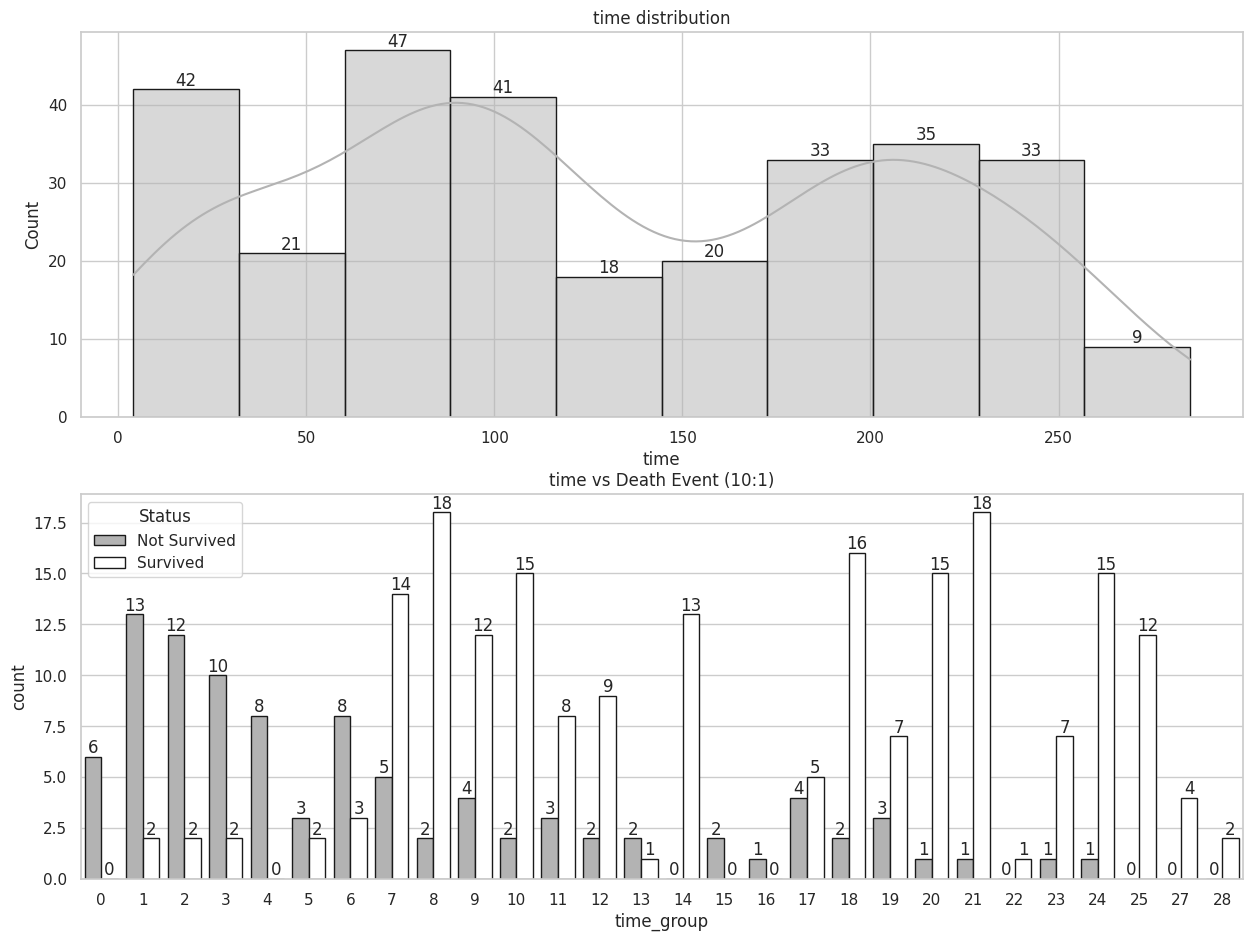

In [27]:
numplot(df, 'time', 10)

### Summary
- Numerical Features Insight :
1. Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases ofDEATH_EVENT can be observed at 45, 50, 60, 65, and 70
2. High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.
3. serum_creatinine values from 0.6 to 3.0 have higher probability to lead to DEATH_EVENT.
4. serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.
5. DEATH_EVENT cases are on a high for the values between 0(0x100) - 500(5x100) forcreatinine_phosphokinase.
6. platelets values between 0(0x10^5) - 400,000(4x10^5) are prone to heart failures leading toDEATH_EVENT.
7. For the time feature, values from 0(0x10) - 60(6*10) have higher probability to lead to a DEATH_EVENT.
- Categorical Features Sumary :
1. age : 50 - 70
2. creatinine_phosphokinase : 0 - 500
3. ejaction_fraction : 20 - 40
4. platelets : 200,000 - 300,000
5. serum_creatinine : 1 - 2
6. serum_sodium : 130 - 140
7. time : 0 - 50
- General Information
1. age : General aging leads to heart failures.
2. creatinine_phosphokinase : > 120 mcg/L
3. ejection_fraction : Normal Range 55% - 70%. Below 55% is prone to heart failures.
4. platelets : Low and very high values of platelets led to heart failure.
5. serum_creatinine : 0.8 - 1.7 (mg/dL) is the range of values that leads to most heart failures.
6. serum_sodium : Above 130 (mEq/L), chances of heart failure increases by alot.
7. time : Ideal follow-up period is of 14 days. Anything above 14 days can lead to worse

## Preprocessing and Features Engineering

### Scaling

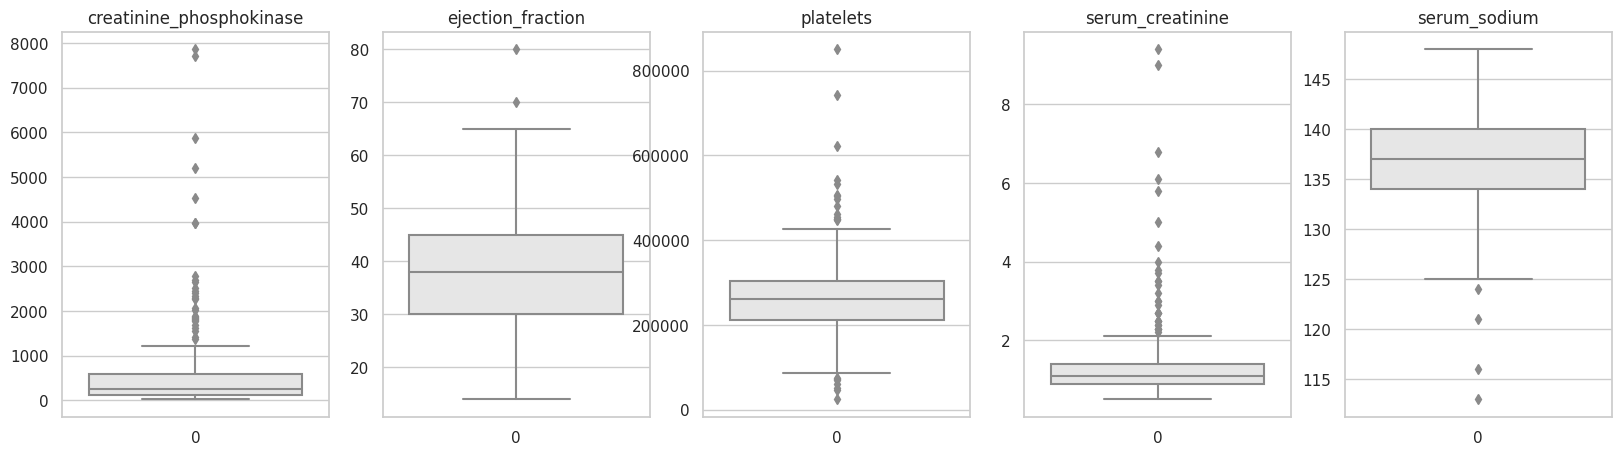

In [28]:
# Checking outliers
vars = data.drop(["age","anaemia","diabetes","high_blood_pressure","sex","smoking","time","DEATH_EVENT"], axis = 1).columns

fig, axs = plt.subplots(1, len(vars), figsize=(20, 5))

for i, var in enumerate(vars):
    sns.boxplot(data=data[var], ax=axs[i], color="#e6e6e6")
    axs[i].set_title(var)

In [29]:
# Outliers detection with Z-score method
import numpy as np
import scipy.stats as stats
#input Function to detect and print outliers for a specific column
def print_column_outliers(column, threshold=3.5):
    z_scores = np.abs(stats.zscore(column))
    outliers = column[np.abs(z_scores) > threshold]
    if not outliers.empty:
        print(f"Outliers in column '{column.name}':")
        print(outliers)

# Detect and print columns with outliers
num_vars = data.drop(["age","anaemia","diabetes","high_blood_pressure","sex","smoking","time","DEATH_EVENT"], axis = 1).columns
for column in num_vars:
    print_column_outliers(df[column])

Outliers in column 'creatinine_phosphokinase':
1      7861
60     7702
72     5882
103    5209
134    4540
Name: creatinine_phosphokinase, dtype: int64
Outliers in column 'ejection_fraction':
64    80
Name: ejection_fraction, dtype: int64
Outliers in column 'platelets':
105    621000
109    850000
296    742000
Name: platelets, dtype: int64
Outliers in column 'serum_creatinine':
9      9.4
28     5.8
52     6.8
131    6.1
217    9.0
Name: serum_creatinine, dtype: float64
Outliers in column 'serum_sodium':
4      116
19     121
199    113
Name: serum_sodium, dtype: int64


**After performing the `Z-test` for outliers on the `numerical variables` in the dataset, it was found that there are outliers present in the dataset. However, this does not necessarily mean that these values are wrong. In fact the outliers seem logical and normal within the context of the dataset.**

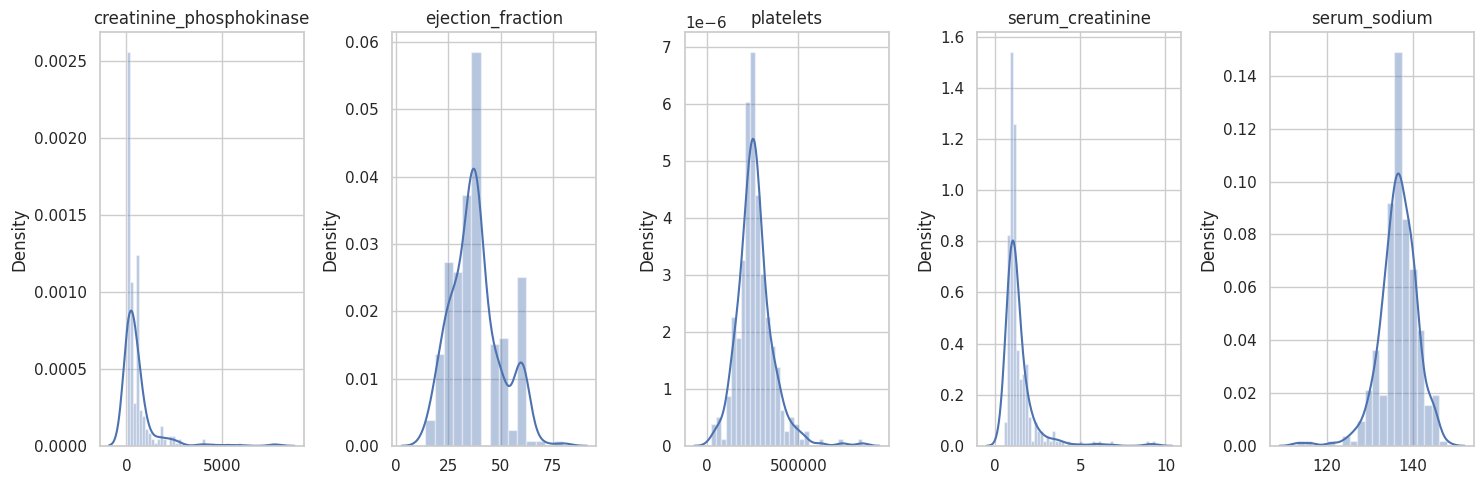

In [30]:
# Set up the figure with multiple axes
fig, axs = plt.subplots(ncols=len(num_vars), figsize=(15,5))

# Plot the distribution of each variable on its own axis
for i, var in enumerate(num_vars):
    sns.distplot(df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [31]:

scaler = MinMaxScaler()  #Min-Max Scaler for normalization " scales your data to a specified range, typically [0, 1] or [-1, 1]"

#scaler = StandardScaler() #Standard Scaler for standardization" mean of 0 and a standard deviation of 1" (z-score normalization)

#scaler = RobustScaler() #RobustScaler for scaling the data while minimizing the influence of outliers values

# Normalize selected columns
data['age'] = scaler.fit_transform(data[['age']])
data['creatinine_phosphokinase'] = scaler.fit_transform(data[['creatinine_phosphokinase']])
data['ejection_fraction'] = scaler.fit_transform(data[['ejection_fraction']])
data['serum_creatinine'] = scaler.fit_transform(data[['serum_creatinine']])
data['time'] = scaler.fit_transform(data[['time']])
data['platelets'] = scaler.fit_transform(data[['platelets']])
data['serum_sodium'] = scaler.fit_transform(data[['serum_sodium']])

# Display the first few rows of the DataFrame after scaling
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1


### Correlation

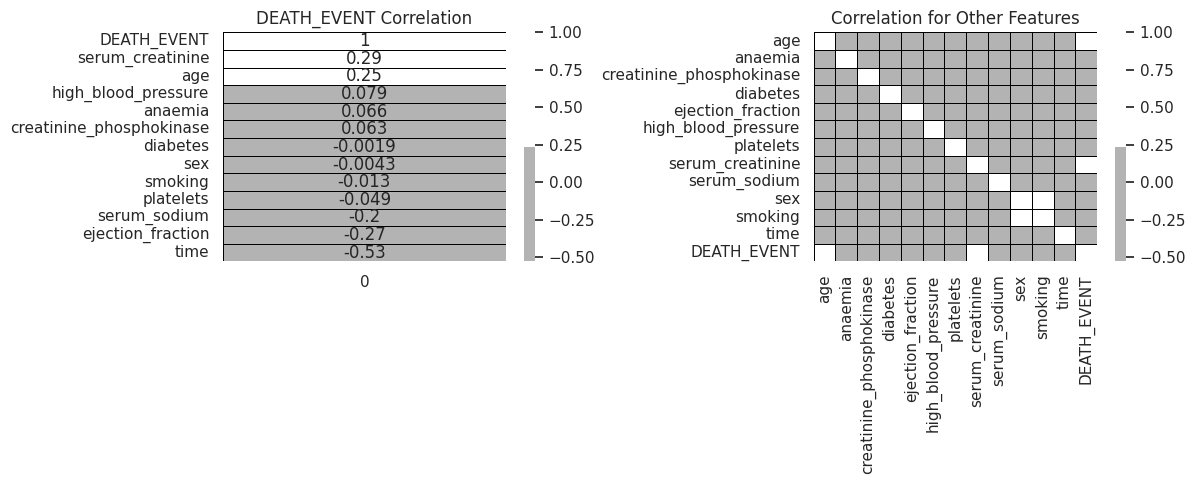

In [32]:
# Create two separate subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create the first heatmap on the left subplot
corr = data.corrwith(data['DEATH_EVENT']).sort_values(ascending=False).to_frame()
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black', ax=axes[0])
axes[0].set_title('DEATH_EVENT Correlation')

# Create the second heatmap on the right subplot
sns.heatmap(data.corr(), annot=False, cmap=colors, linewidths=0.7, linecolor='black', ax=axes[1])
axes[1].set_title('Correlation for Other Features')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


**Features like :**
high_blood_pressure, anaemia, creatinine_phosphokinase, diabetes, sex,smoking, and platelets do not display any kind of correlation with DEATH_EVENT

We will create 2 models :
- Based on the statistical test, we will drop the following features : high_blood_pressure, anaemia,creatinine_phosphokinase, diabetes, sex, smoking, and platelets
- Based on the General information., we will drop the following features : sex, platelets.

### Data Balancing

In [33]:
# Initialize the SMOTE object
over = SMOTE()
df3 = data.copy()
# Select the feature columns (first 5 columns) and the target column (6th column) from df1
f1 = df3.drop(columns=['DEATH_EVENT']).values #df3.iloc[:, :-1].values
t1 = df3.iloc[:, -1].values

# Apply SMOTE to balance the dataset
f1, t1 = over.fit_resample(f1, t1)

# Count the class distribution after SMOTE
Counter(t1)


Counter({1: 203, 0: 203})

## Machine Learning Model Creation

In [34]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2, random_state=42)


In [35]:
# Logistic Regression
# Define a grid of hyperparameter values for C
param_grid = {'C': [10, 100, 200, 1000]}

# *Create a Logistic Regression model with L1 regularization and 'liblinear' solver
LR = LogisticRegression(solver='liblinear', penalty='l1', random_state=123)

# Create a RandomizedSearchCV object for hyperparameter tuning
LR = RandomizedSearchCV(estimator=LR, param_distributions=param_grid)

# *Fit the Logistic Regression model to the training data
LR.fit(x_train, y_train)

# Print the best estimator found by the hyperparameter search
print(LR.best_estimator_)

# Print the coefficients and intercept of the best estimator
print(LR.best_estimator_.coef_, LR.best_estimator_.intercept_)


LogisticRegression(C=100, penalty='l1', random_state=123, solver='liblinear')
[[ 2.46930182 -0.11122038  1.99043069 -0.0178233  -5.40213575 -0.26093409
  -0.81708866  5.10205677 -3.51887186 -0.69672374 -0.02148028 -6.41012327]] [5.86564928]


In [36]:
# *Make predictions using the best Logistic Regression model on the test data
LR_best_pred = LR.best_estimator_.predict(x_test)

# Calculate predicted probabilities of the positive class (class 1) using the best model
LR_best_pred_probs = LR.best_estimator_.predict_proba(x_test)[:, 1]


## Model Evaluation

In [37]:
#checking for overfitting
print ('Logistic Regression Training score',round(LR.score(x_train, y_train),5))
print ('Logistic Regression Testing score',round(LR.score(x_test, y_test),5))

Logistic Regression Training score 0.81481
Logistic Regression Testing score 0.86585


- **True Positives (TP)**: The model predicted the positive class correctly, and the actual class is indeed positive.

- **True Negatives (TN)**: The model predicted the negative class correctly, and the actual class is indeed negative.

- **False Positives (FP)**: The model predicted the positive class, but the actual class is negative.

- **False Negatives (FN)**: The model predicted the negative class, but the actual class is positive.


**Accuracy** : Is the metric to evaluate how correcct the model is to predict the values.

* Accuracy = (true_positive + true_negative) / (true_positive + false_positive
+ false_negative + true_negative)

**Precision** : Out of all actual values, how many are correctly predicted
* Precision = true_positive/(true_positive+false_positive)

**Recall** : From all the predicted values how many are correctly predicted.
* Recall = true_positive/(true_positive+false_negative)

**F1 score** : Is the best choice if your distrubution is uneven.
* F1_score = 2(Recall Precision)/(Recall + Precision)

In [38]:
print(classification_report(y_test,LR_best_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.84      0.90      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



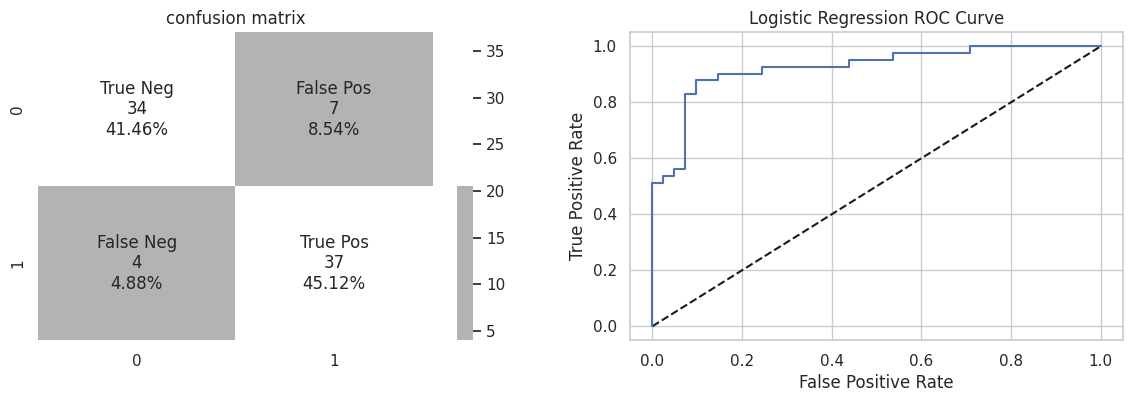

In [39]:
# Calculate the confusion matrix using the predicted values
cm = confusion_matrix(y_test, LR_best_pred)

# Create a figure for the plots
plt.figure(figsize=(14,4))

# Subplot 1: Plot the normalized confusion matrix as a heatmap
plt.subplot(1,2,1)
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = [value for value in cm.flatten()] # Flatten the confusion matrix and store the values in 'counts'
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)] # Calculate the percentages for each value in the confusion matrix
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)] # Create labels combining the names, counts, and percentages
labels = np.asarray(labels).reshape(2, 2) # Reshape the labels into a 2x2 array to match the shape of the confusion matrix
sns.heatmap(cm, annot=labels, cmap=colors, fmt='') # Create a heatmap using seaborn to visualize the confusion matrix
plt.title('confusion matrix')
__
# Subplot 2: Plot the Receiver Operating Characteristic (ROC) curve
plt.subplot(1,2,2)
fpr, tpr, thresholds = roc_curve(y_test, LR_best_pred_probs) # Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
plt.plot([0,1], [0,1], 'k--') # Plot the diagonal reference line and the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# Display the plots
plt.show()


In [40]:
X = np.array([[75,0,582,1,30,1,263358.03,1.83,134,0,0,23]])
X_scaled = scaler.fit_transform(X)
prediction = LR.best_estimator_.predict(X_scaled)
prediction

array([1])

## Saving The Model

In [41]:
import pickle

data = {"model": LR.best_estimator_, "age":data['age'],"anaemia":data['anaemia'],
        "creatinine_phosphokinase":data['creatinine_phosphokinase'],"diabetes":data['diabetes'],
        "ejection_fraction":data['ejection_fraction'],"high_blood_pressure":data['high_blood_pressure'],
        "platelets":data['platelets'],"serum_creatinine":data['serum_creatinine'],
        "serum_sodium":data['serum_sodium'],"sex":data['sex'],"smoking":data['smoking'],
        "time":data['time']}


In [42]:
with open('saved_steps.pkl', 'wb') as file:   # wb= write binary mode
    pickle.dump(data, file)

## Loading The Model

In [43]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

Model_loaded = data["model"]
data['age'] = data['age']
data['anaemia'] =data['anaemia']
data['creatinine_phosphokinase']=data['creatinine_phosphokinase']
data['diabetes']=data['diabetes']
data['ejection_fraction']=data['ejection_fraction']
data['high_blood_pressure']=data['high_blood_pressure']
data['platelets']=data['platelets']
data['serum_creatinine']=data['serum_creatinine']
data['serum_sodium']=data['serum_sodium']
data['sex']=data['sex']
data['smoking']=data['smoking']
data['time']= data['time']

In [44]:
y_pred = Model_loaded.predict(X_scaled)
y_pred

array([1])